# Diabetes Prediction - ML-Model

#### Load preprocessed data, Build, Select, Train and Evaluate Models

In [2]:
from models_config import *
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

print("Libraries Imported ..")

Libraries Imported ..


## 1. Load Preprocessed Dataset

In [3]:
DATA_PATH =  "../data/prepared_data.json"
mfcc, labels = load_data(DATA_PATH)

In [4]:
print(f" MFCCs Shape : {mfcc.shape} | Labels Length : {len(labels)}")

 MFCCs Shape : (8275, 44, 13) | Labels Length : 8275


## 2. Data Preparation

In [5]:
X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2, DATA_PATH)
pd.DataFrame({"Training": [X_train.shape, y_train.shape], 
              "Validation":[X_validation.shape, y_validation.shape], 
              "Testing":[X_test.shape, y_test.shape]}, index=['Features', 'Target'])

,Training,Validation,Testing
Features,"(4964, 44, 13, 1)","(1242, 44, 13, 1)","(2069, 44, 13, 1)"
Target,"(4964,)","(1242,)","(2069,)"


## 3. Build Model

In [6]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)
model = build_cnn_model(input_shape)

## 4. Compule Model

In [7]:
lr, loss, metrics = 0.0001, 'sparse_categorical_crossentropy', 'accuracy'
model = compule_model(lr, loss, metrics, model)

## 5.  Model Summary

In [8]:
 model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 42, 11, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 21, 6, 32)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 21, 6, 32)        128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 19, 4, 32)         9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 2, 32)        0         
 2D)                                                             
                                                        

## 6. Train Model

In [9]:
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

Epoch 1/30
156/156 [==============================] - 2s 11ms/step - loss: 2.7805 - accuracy: 0.0927 - val_loss: 2.3638 - val_accuracy: 0.0966
Epoch 2/30
156/156 [==============================] - 2s 10ms/step - loss: 2.5369 - accuracy: 0.1334 - val_loss: 2.3135 - val_accuracy: 0.1506
Epoch 3/30
156/156 [==============================] - 2s 10ms/step - loss: 2.4438 - accuracy: 0.1465 - val_loss: 2.2922 - val_accuracy: 0.1731
Epoch 4/30
156/156 [==============================] - 2s 10ms/step - loss: 2.3632 - accuracy: 0.1672 - val_loss: 2.2640 - val_accuracy: 0.1916
Epoch 5/30
156/156 [==============================] - 2s 10ms/step - loss: 2.3178 - accuracy: 0.1861 - val_loss: 2.2210 - val_accuracy: 0.2174
Epoch 6/30
156/156 [==============================] - 2s 10ms/step - loss: 2.2759 - accuracy: 0.1962 - val_loss: 2.2074 - val_accuracy: 0.2174
Epoch 7/30
156/156 [==============================] - 1s 9ms/step - loss: 2.2493 - accuracy: 0.2065 - val_loss: 2.1783 - val_accuracy: 0.2399


## 7. Plot Model Training History

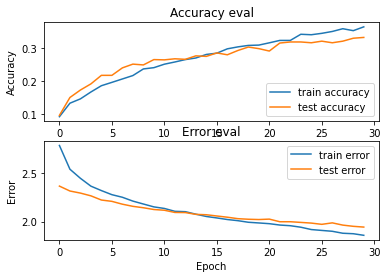

<Figure size 1152x576 with 0 Axes>

In [10]:
plot_history(history)

## 8.  Evaluate Model on test set

In [12]:
model_loss_acc(model, X_train, y_train, X_test, y_test, X_validation, y_validation)

65/65 - 0s - loss: 1.9301 - accuracy: 0.3349 - 215ms/epoch - 3ms/step


,Training,Validation,Testing
Accuracy,45.63,33.17,0.334944
Loss,169.19,194.36,193.010000


## 9. Prediction

In [13]:
# pick a sample to predict from the test set
X_to_predict = X_test[100]
y_to_predict = y_test[100]

# predict sample
predict(model, X_to_predict, y_to_predict)

Target: 4, Predicted label: [7]


#####################################################################################################

#####################################################################################################

#####################################################################################################